# Cluster Validation
In this lesson, we'll be analyzing the `Beer` dataset and the `UserTracks` dataset to help us begin to systematically evaluate the performance of our clustering algorithm. We'll focus on using these metrics for Kmeans, but all the methods presented can be applied to other clustering algorithms. 

In [1]:
# beer dataset
import pandas as pd
url = '../data/beer.txt'
beer = pd.read_csv(url, sep=' ')
beer.head()

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


In [2]:
# define X
X = beer.drop('name', axis=1)

In [3]:
# K-means with 3 clusters
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [4]:
# Review the cluster labels
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1],
      dtype=int32)

In [5]:
# save the cluster labels and sort by cluster
beer['cluster'] = km.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
2,Lowenbrau,157,15,0.9,0.48,0
3,Kronenbourg,170,7,5.2,0.73,0
4,Heineken,152,11,5.0,0.77,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
16,Hamms,139,19,4.4,0.43,0


### Visualing the Cluster Centers
The cluster centers are available to us from the sklearn Kmeans implmentation. Let's see if we can begin to understand what the clusters seem to be based on and why?

In [6]:
# review the cluster centers
km.cluster_centers_

array([[150.        ,  17.        ,   4.52142857,   0.52071429],
       [102.75      ,  10.        ,   4.075     ,   0.4225    ],
       [ 70.        ,  10.5       ,   2.6       ,   0.42      ]])

In [7]:
# calculate the mean of each feature for each cluster
centers = beer.groupby('cluster').mean()
centers.head()

,calories,sodium,alcohol,cost
cluster,,,,
0,150.00,17.0,4.521429,0.520714
1,102.75,10.0,4.075000,0.422500
2,70.00,10.5,2.600000,0.420000


In [10]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [11]:
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

Text(0,0.5,'alcohol')

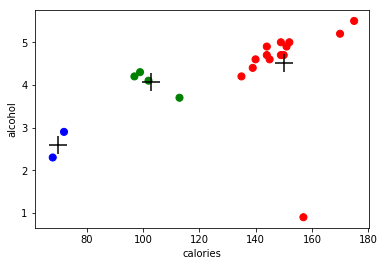

In [12]:
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(beer.calories, beer.alcohol, c=colors[list(beer.cluster)], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('calories')
plt.ylabel('alcohol')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20fa3be0>,
      dtype=object)

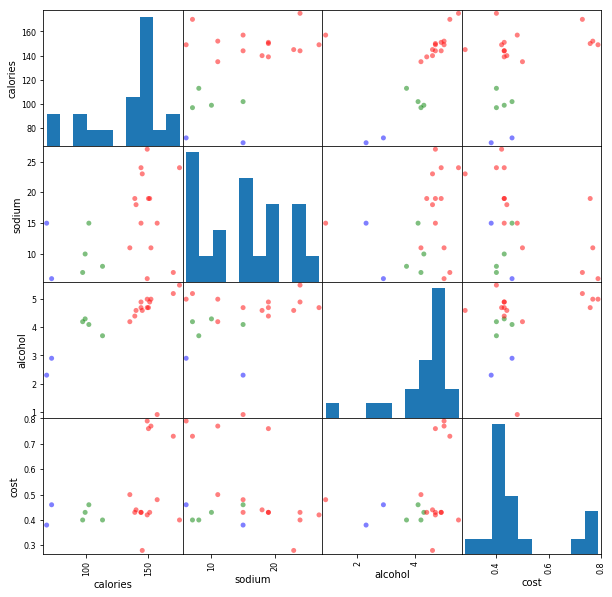

In [13]:
# scatter plot matrix of new cluster assignments (0=red, 1=green, 2=blue)
pd.plotting.scatter_matrix(X, c=colors[list(beer.cluster)], figsize=(10,10), s=100)

## Challenge
_5 minutes_

What do the clusters seem to be based on and why?

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

The silhouette coefficient can take values between -1 and 1.

In general, we want separation to be high and cohesion to be low. This corresponds to a value of `SC` close to +1. 

A negative silhouette coefficient means the cluster radius is larger than the space between clusters, and thus clusters overlap. 

## Internal Validation
In general, k-means will converge to a solution and return a partition of k clusters, even if no natural clusters exist in the data.

We will look at two validation metrics useful for partitional clustering, __cohesion__ and __separation__. 

__Cohesion__ measures clustering effectiveness within a cluster:
$$ \hat{C}(C_i) = \sum_{xEc_i}d(x, c_i)$$

__Separation__ measures clustering effectiveness between clusters:

$$\hat{S}(C_i, C_j) = d(c_i, c_j)$$

One useful measure that combines the ideas of cohesion and separation is the __silhouette coefficient__. For point x, this is given by:
    $$SC_i = \frac{b_i-a_i}{max(a_i, b_i)}$$

such that:
* $a_i$ = average in-cluster distance to $x_i$
* $b_{ij}$ = average between-cluster distance to $x_i$
* $b_i = min_j(b_{ij})$

The silhouette coefficient for the cluster $C_i$ is given by the average silhouette coefficient across all points in $C_i$:
$$SC(C_i) = \frac{1}{m_i}\sum_{x\in{C_i}}{SC_i}$$

The overall silhouette coefficient is given by the average silhouette coefficient across all clusters:
$$SC_{total} = \frac{1}{k}\sum_{1}^{k}SC(C_i)$$

*Note:* This gives a summary measure of the overall clustering quality. 
*Application:* Determining the best number of clusters for your dataset
A Silhouette of +1 means that the clustering is working and values are assigned to the correct cluster, a Silhouette of -1 means that the data is most likely assigned to wrong clusters, scores near zero indicate overlapping clusters.

Another useful measure in understanding overall cluster quality is the __point-biserial__ value. 

$ \bar Y_1 - \bar Y_0 / s_y \sqrt N_1 N_2 / N(N-1)) $

Where Y0 and Y1 are the means of the clusters; N0 and N1 are the number of observations coded to the clusters and Sy is the standard deviation with N as the number of observations.

Point-Biserial can be used to identify well connected clusters with high or low values. Values near zero indicate poor clustering. 

In [9]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

##### Silhouette Coefficient
The silhouette coefficient can take on values between -1 and 1. 

In [16]:
from sklearn import metrics
metrics.silhouette_score(X, km.labels_)

0.673177675107006

In [17]:
# calculate SC for K=2 through K=19
k_range = range(2, 20,1)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X)
    scores.append(metrics.silhouette_score(X, km.labels_))

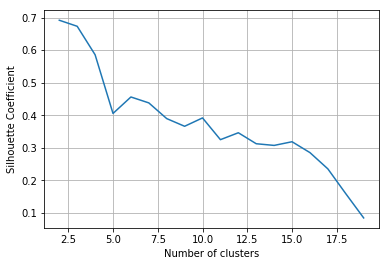

In [18]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

## Exercise
_20-30 minutes_

Cluster the `UserTopTracks` dataset with Kmeans and perform Silhouette analysis to pick the optimal number of $k$ paritions. 

Visualize the results of the clustering, and describe the patterns in music preference.

In [ ]:
url = '../data/UserTopTracks.csv'
tracks = pd.read_csv(url, encoding='latin1')
tracks.head()